* Text preprocessing techniques required for topic modelling
* Building a LDA topic model using SKLEARN library

In [ ]:
import re, numpy as np, pandas as pd, matplotlib.pyplot as plt, nltk
from wordcloud import WordCloud
# Text Cleaning
from gensim.parsing.porter import PorterStemmer
from gensim.parsing.preprocessing import remove_stopwords

# Feature extraction
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1DkNknVKnj9wHsH4BNxlMMbE56XUMJbIm'}) # replace the id with id of file you want to access
downloaded.GetContentFile('emails_articles.csv') 

In [ ]:
data = pd.read_csv('emails_articles.csv')
data.head()

,text
0,From: keithley@apple.com (Craig Keithley)\nSub...
1,From: fist@iscp.bellcore.com (Richard Pierson)...
2,From: bressler@iftccu.ca.boeing.com (Rick Bres...
3,From: hays@ssd.intel.com (Kirk Hays)\nSubject:...
4,From: shz@mare.att.com (Keeper of the 'Tude)\n...


In [ ]:
 print(data.iloc[0]['text'])

From: keithley@apple.com (Craig Keithley)
Subject: Re: Moonbase race, NASA resources, why?
Organization: Apple Computer, Inc.
Lines: 44

In article <C5w5un.Bpq@zoo.toronto.edu>, henry@zoo.toronto.edu (Henry
Spencer) wrote:
> 
> The major component of any realistic plan to go to the Moon cheaply (for
> more than a brief visit, at least) is low-cost transport to Earth orbit.
> For what it costs to launch one Shuttle or two Titan IVs, you can develop
> a new launch system that will be considerably cheaper.  (Delta Clipper
> might be a bit more expensive than this, perhaps, but there are less
> ambitious ways of bringing costs down quite a bit.)  

Ah, there's the rub.  And a catch-22 to boot.  For the purposes of a
contest, you'll probably not compete if'n you can't afford the ride to get
there.  And although lower priced delivery systems might be doable, without
demand its doubtful that anyone will develop a new system.  Course, if a
low priced system existed, there might be demand...  


* Above: header & content is all together which should be split for further analysis

In [ ]:
data.iloc[0]['text']

'From: keithley@apple.com (Craig Keithley)\nSubject: Re: Moonbase race, NASA resources, why?\nOrganization: Apple Computer, Inc.\nLines: 44\n\nIn article <C5w5un.Bpq@zoo.toronto.edu>, henry@zoo.toronto.edu (Henry\nSpencer) wrote:\n> \n> The major component of any realistic plan to go to the Moon cheaply (for\n> more than a brief visit, at least) is low-cost transport to Earth orbit.\n> For what it costs to launch one Shuttle or two Titan IVs, you can develop\n> a new launch system that will be considerably cheaper.  (Delta Clipper\n> might be a bit more expensive than this, perhaps, but there are less\n> ambitious ways of bringing costs down quite a bit.)  \n\nAh, there\'s the rub.  And a catch-22 to boot.  For the purposes of a\ncontest, you\'ll probably not compete if\'n you can\'t afford the ride to get\nthere.  And although lower priced delivery systems might be doable, without\ndemand its doubtful that anyone will develop a new system.  Course, if a\nlow priced system existed, the

* Just printed the above statement w/o print to know where the header ends
* Header ends where we get \n\n(Inc.\nLines: 44\n\nIn article) to represent an empty line

In [ ]:
docs = []
for x in data['text']:
  doc = ' '.join(x.split('\n\n')[1:]) # splitting by empty lines and removing the first element which is header and then joining back all elements & storing as a doc 
  docs.append(doc)
docs = pd.Series(docs)
print(len(docs))

2336


* We have 2336 emails 

# POS recognition

In [ ]:
tokens = docs[0].split() # recognizing pos for first mail only and splitting to get individual words 
nltk.pos_tag(tokens) # and passing the list to pos_tag

[('In', 'IN'),
 ('article', 'NN'),
 ('<C5w5un.Bpq@zoo.toronto.edu>,', 'NNP'),
 ('henry@zoo.toronto.edu', 'NN'),
 ('(Henry', 'NNP'),
 ('Spencer)', 'NNP'),
 ('wrote:', 'VBD'),
 ('>', 'NNP'),
 ('>', 'VBD'),
 ('The', 'DT'),
 ('major', 'JJ'),
 ('component', 'NN'),
 ('of', 'IN'),
 ('any', 'DT'),
 ('realistic', 'JJ'),
 ('plan', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('Moon', 'NNP'),
 ('cheaply', 'NN'),
 ('(for', 'NNP'),
 ('>', 'NNP'),
 ('more', 'JJR'),
 ('than', 'IN'),
 ('a', 'DT'),
 ('brief', 'JJ'),
 ('visit,', 'NN'),
 ('at', 'IN'),
 ('least)', 'NN'),
 ('is', 'VBZ'),
 ('low-cost', 'JJ'),
 ('transport', 'NN'),
 ('to', 'TO'),
 ('Earth', 'NNP'),
 ('orbit.', 'MD'),
 ('>', 'VB'),
 ('For', 'IN'),
 ('what', 'WP'),
 ('it', 'PRP'),
 ('costs', 'VBZ'),
 ('to', 'TO'),
 ('launch', 'VB'),
 ('one', 'CD'),
 ('Shuttle', 'NNP'),
 ('or', 'CC'),
 ('two', 'CD'),
 ('Titan', 'NNP'),
 ('IVs,', 'NNP'),
 ('you', 'PRP'),
 ('can', 'MD'),
 ('develop', 'VB'),
 ('>', 'VB'),
 ('a', 'DT'),
 ('n

In [ ]:
tokens = docs[0].split()

for x in nltk.pos_tag(tokens):
  if x[1].startswith('NN'): # extracting only words which are nouns and have pos_tag as 'NN' from a tuples
    print(x[0])

article
<C5w5un.Bpq@zoo.toronto.edu>,
henry@zoo.toronto.edu
(Henry
Spencer)
>
component
plan
Moon
cheaply
(for
>
visit,
least)
transport
Earth
Shuttle
Titan
IVs,
launch
system
(Delta
Clipper
>
bit
perhaps,
ways
bringing
costs
bit.)
Ah,
rub.
catch-22
purposes
contest,
you'll
if'n
ride
delivery
systems
demand
anyone
system.
Course,
low
system
existed,
way
contest
cost
payload
delivery
accounting
methods
out.
example,
Rockwell
engines?
plan
>
exploration
systems
money
way.
>
launch
system
line.
words,
deal
worthwhile
technology
(life
etc.)
cost
launch
system.
stuff
forever,
I'd
folks
anything
cost
Mac,
oops,
system
line.
I'd
slippery
concept.
goal
exploration
years,
money.
goal
moon
$500
million,
exploration
decade
Craig
Craig
Keithley
|"I
don't
remember,
Apple
Computer,
Inc.
|I
memory
anything
keithley@apple.com
|Peter
Gabriel,
Third
Album
(1980)


In [ ]:
docs_clean = []

for x in tqdm(docs): # docs as series from above step 
  tokens = x.split() 
  tokens_nouns = [y[0] for y in nltk.pos_tag(tokens) if y[1].startswith('NN')]
  doc_clean = ' '.join(tokens_nouns)
  docs_clean.append(doc_clean)

100%|██████████| 2336/2336 [00:37<00:00, 62.12it/s]


In [ ]:
docs_clean[0] # 1st doc

'article <C5w5un.Bpq@zoo.toronto.edu>, henry@zoo.toronto.edu (Henry Spencer) > component plan Moon cheaply (for > visit, least) transport Earth Shuttle Titan IVs, launch system (Delta Clipper > bit perhaps, ways bringing costs bit.) Ah, rub. catch-22 purposes contest, you\'ll if\'n ride delivery systems demand anyone system. Course, low system existed, way contest cost payload delivery accounting methods out. example, Rockwell engines? plan > exploration systems money way. > launch system line. words, deal worthwhile technology (life etc.) cost launch system. stuff forever, I\'d folks anything cost Mac, oops, system line. I\'d slippery concept. goal exploration years, money. goal moon $500 million, exploration decade Craig Craig Keithley |"I don\'t remember, Apple Computer, Inc. |I memory anything keithley@apple.com |Peter Gabriel, Third Album (1980)'

In [ ]:
docs_clean[1] # 2nd doc

'article <speedy.147@engr.latech.edu>, speedy@engr.latech.edu (Speedy Mercer) |> hubcap once. Yamaha |> Twin (A.K.A. "the tank") noise left. glimpse something silver foot |> |> nanosecond bike HARD |> |> side. foot peg, |> there! parking lot type hubcap cage! hubcap |> pounds! impact left peg |> frame |> shifter process. |> cap, sans portion |> |> Anyone sort experience? |> cap "Lumber delivery trucks" life interesting \'dip\' road sheets sheetrock dozen gallon cans spackle mph. interesting seconds so. Had wood mallet spackle Me, Helmet bike Thanks bob tail Kenworth truck "Path" tires monsoon tires spackle didn\'t burst impact). car front lane brakes, bridge abutment half way time San Diego way apartment beach Sportster shake, burger fries jack box em foul weather jacket milk shake Nimitz blvd mph, nothing smell vanilla milk engine groin legs people back turn types ships NAVY; SUBMARINES TARGETS !!! #1/XS1100LH DoD #956 #2 Next raise Richard Pierson E06584 vnet: [908] Internet: fist@is

# Cleaning the document

In [ ]:
stemmer = PorterStemmer()
docs_clean = pd.Series(docs_clean) # converting to series for easy string ops
docs_clean = docs.str.lower().str.replace('\n',' ') # lower case and replacement of \n chars
docs_clean = docs_clean.str.replace('\S*@\S*\s','') # using regex to remove emails addresses
docs_clean = docs_clean.str.replace('[^a-z\s]', '') # retaining only alphabets and spaces 
docs_clean = docs_clean.apply(lambda x : remove_stopwords(x)) # removing stop words
docs_clean = pd.Series(stemmer.stem_documents(docs_clean)) # applying stemming
docs_clean = docs_clean.apply(lambda y : remove_stopwords(y)) # sometimes stemmed words can be part of stop words, so removing stop words again

In [ ]:
docs_clean[0]

'articl henri spencer wrote major compon realist plan moon cheapli brief visit lowcost transport earth orbit cost launch shuttl titan iv develop new launch consider cheaper delta clipper bit expens ambiti wai bring cost bit ah rub catch boot purpos contest youll probabl compet ifn afford ride lower price deliveri doabl demand doubt develop new cours low price exist demand wonder wai structur contest encourag low cost payload deliveri account method probabl hardest work exampl allow rockwel loan engin forth plan sustain lunar explor exist launch wast monei big wai depend soon new launch come line word great deal worthwhil technolog life support navig develop prior low cost launch wouldnt want expens stuff forev id hate folk wait low cost mac oop mean launch come line guess id simplifi wast slipperi concept goal man lunar explor year wast monei goal explor moon million explor decad craig craig keithlei dont rememb dont recal appl got memori peter gabriel album'

In [ ]:
docs_clean[1]

'articl speedi mercer write attack rabid hubcap work yamaha twin aka vibrat tank heard wierd nois left caught glimps silver head left foot jerk nanosecond bike hit hard left went foot peg pull nearest park lot discov hit wirewheel type hubcap larg cage hubcap weigh pound impact bent left peg flat frame tweek shifter process heard approach cap feel certian san portion left foot sort experi hub cap lumber yard deliveri truck life hit dip road sheet sheetrock dozen gallon spackl came mph got real second wood mallet dri spackl helmet bike got home thank bob tail kenworth lumber truck path drive tire threw correspond monsoon tire ran spackl didnt burst impact car right lane hit brake nail bridg abut half wai second messiest time san diego wai apart ocean beach sportster pick shake burger n fri jack box stuf em foul weather jacket milk shake open nimitz blvd mph like smell vanilla milk shake cook engin run groin leg peopl wait left turn type ship navi submarin target xslh dod rais richard pi

# Convert the text doc into DTM 
* Using CountVectorizer
# Build topic modelling
* Using LatentDirichletAllocation

In [ ]:
stopwords = ['write', 'articl', 'dont', 'like', 'mean', 'wai', 'know', 'dai', 'time', 'im', 'think', 'said', 'got', 'need', 'want']

num_topics = 4 # no of topics we want, it's a hyperparameter which is customized and has to be tried out in combinations 
vectorizer = CountVectorizer(min_df=5, stop_words=stopwords).fit(docs_clean) # min_df=5 -> retaining tokens which appeared in at-least 5 docs
dtm = vectorizer.transform(docs_clean)
lda = LatentDirichletAllocation(n_components=num_topics, random_state=1)
lda.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=1, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

# Understanding Topic Modelling Results_demovid18
* How to analyze the model built for topic modelling
* Extract matrices to identify the relationship b/w 
  * Topics & Terms
  * Documents & Topics
* Tag each document with a topic

In [ ]:
dtm

<2336x5666 sparse matrix of type '<class 'numpy.int64'>'
	with 167530 stored elements in Compressed Sparse Row format>

* There are 5666 total tokens in this particular corpus

# Find out what weights are associated with each of the above tokens
* Required for a specific topic as top 10/15 words

In [ ]:
len(lda.components_[0]) 

5666

* Above result shows we have weights associated with every token 

In [ ]:
lda.components_[0][:10]

array([ 3.6480035 , 10.55586411, 12.25557388,  0.25106031,  3.6329946 ,
       41.20387422, 80.39222947,  0.25596808,  7.56581892,  2.30703769])

* Extracting weights associated with topic 0 
* We have topics ranging from 0-3 coz num_topics = 4

# Convert weights into a DF 

In [ ]:
# Extracting column/feature name using get_feature_names()
df_topic_term = pd.DataFrame({'term':vectorizer.get_feature_names(),
                              'weights':lda.components_[0]})
df_topic_term.sort_values('weights', ascending=False).head(5)



,term,weights
2094,god,1505.932315
825,christian,889.242066
3670,peopl,786.951452
454,believ,751.902915
2675,jesu,588.247302


* Model will generate terms based on which we need to assign a topic name
* Above results are talking about religion

In [ ]:
print(df_topic_term.sort_values('weights', ascending=False).head(10)['term'].tolist())

['god', 'christian', 'peopl', 'believ', 'jesu', 'church', 'question', 'come', 'thing', 'christ']


Ignoring the weights and converting term names into a list

# Extracting column/feature names for all topics

In [ ]:
for x in range(4):
  print('Topic %d' % x)
  df_topic_term2 = pd.DataFrame({'term':vectorizer.get_feature_names(),
                              'weights':lda.components_[x]})
  df_topic_term2 = df_topic_term2.sort_values('weights', ascending=False)
  print(df_topic_term2.head(10)['term'].tolist())
  print(''*2)

Topic 0
['god', 'christian', 'peopl', 'believ', 'jesu', 'church', 'question', 'come', 'thing', 'christ']

Topic 1
['space', 'orbit', 'launch', 'nasa', 'year', 'file', 'satellit', 'new', 'mission', 'program']

Topic 2
['gun', 'peopl', 'weapon', 'right', 'firearm', 'state', 'law', 'govern', 'crime', 'kill']

Topic 3
['bike', 'dod', 'ride', 'motorcycl', 'look', 'good', 'thing', 'right', 'dog', 'new']



* Sometimes words will not come out properly in which case we have to iterate through other topic numbers
* We can increase/decrease the no of topics
* Change the preprocessing techniques we have 
* Keep iterating untill we are satisfied with the results under topics

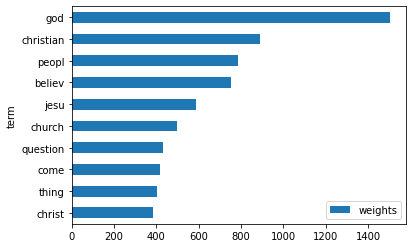

In [ ]:
  df_topic_term = pd.DataFrame({'term':vectorizer.get_feature_names(),
                                'weights':lda.components_[0]})
  df_topic_term.sort_values('weights', ascending=False).head(10)[::-1].plot.barh(x='term', y='weights' )

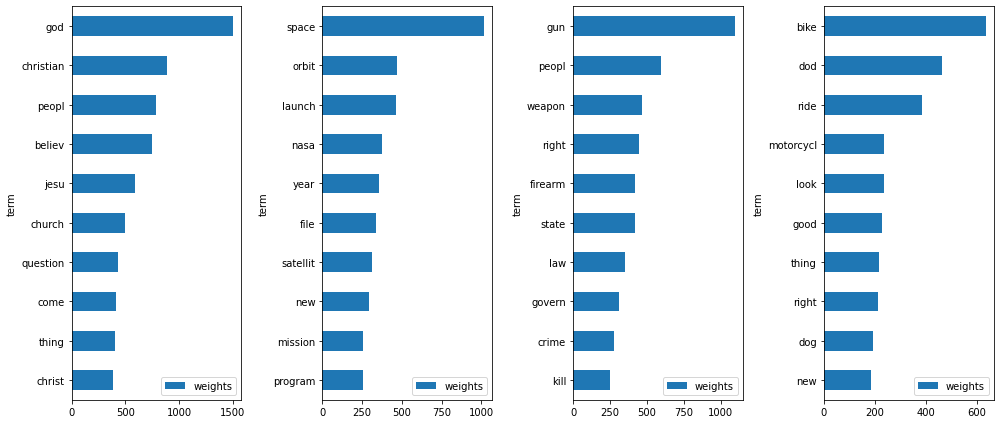

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(14,6)) # one row 4 cols
for x in range(4):
  df_topic_term2 = pd.DataFrame({'term':vectorizer.get_feature_names(),
                              'weights':lda.components_[x]})
  df_topic_term2 = df_topic_term2.sort_values('weights', ascending=False)
  df_topic_term2.head(10)[::-1].plot.barh(x='term', y='weights', ax=ax[x])
plt.tight_layout()

# Check relationships b/w doc and topic

In [ ]:
docs_topics = lda.transform(dtm)
docs_topics

array([[0.00182528, 0.8383777 , 0.00181798, 0.15797905],
       [0.00171697, 0.00176524, 0.00173448, 0.9947833 ],
       [0.00533125, 0.07430863, 0.91521728, 0.00514284],
       ...,
       [0.00127249, 0.48219444, 0.00121598, 0.51531708],
       [0.00797614, 0.00773729, 0.0079894 , 0.97629717],
       [0.00800368, 0.00791   , 0.00800761, 0.97607872]])

* Above results are list of lists of multiple documents 
* Each row represents probabilities of 4 topics from topic no : 0-3
* Probabilities wherever high can be interpreted in the form of topic name selection for the whole document in each row
* For e.g. -> row1 : 0.8383777 (topic1->space), row2 : 0.9947833 (topic4->bike) and so on.

In [ ]:
df_docs_topics = pd.DataFrame(docs_topics, columns=['Topic-%d' %x for x in range(num_topics)])
df_docs_topics.head()

,Topic-0,Topic-1,Topic-2,Topic-3
0,0.001825,0.838378,0.001818,0.157979
1,0.001717,0.001765,0.001734,0.994783
2,0.005331,0.074309,0.915217,0.005143
3,0.097802,0.003992,0.894198,0.004008
4,0.009355,0.009169,0.009265,0.972211


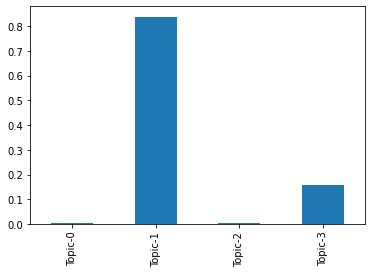

In [ ]:
df_docs_topics.iloc[0].plot.bar() 

In [ ]:
df_docs_topics.apply(lambda v : v.argmax(), axis=1)

0       1
1       3
2       2
3       2
4       3
       ..
2331    1
2332    0
2333    3
2334    3
2335    3
Length: 2336, dtype: int64

* Looped through each row and used argmax() fn which gives col with max prob
* Where 1st col represented the doc no and 2nd col represented it's topic no prob

# Manually replace the topic no's with name 

In [ ]:
df_docs_topics = pd.DataFrame(docs_topics, columns=['Topic-%d' %x for x in range(num_topics)])
df_docs_topics['Topic_Number'] = df_docs_topics.apply(lambda v : v.argmax(), axis=1)
df_docs_topics['Topic_Name'] = df_docs_topics['Topic_Number'].replace({
    0: 'religion',
    1: 'space',
    2: 'crime',
    3: 'bike'
}) 
df_docs_topics.head()

,Topic-0,Topic-1,Topic-2,Topic-3,Topic_Number,Topic_Name
0,0.001825,0.838378,0.001818,0.157979,1,space
1,0.001717,0.001765,0.001734,0.994783,3,bike
2,0.005331,0.074309,0.915217,0.005143,2,crime
3,0.097802,0.003992,0.894198,0.004008,2,crime
4,0.009355,0.009169,0.009265,0.972211,3,bike


In [ ]:
df_docs_topics['Topic_Name'].value_counts() 

bike        715
religion    623
space       520
crime       478
Name: Topic_Name, dtype: int64